# Interviewing your data, visually, in Python.

(The session formerly known as ”Visualization and analysis in Python“.)

### Good morning.
We're [@Nat_Lash](http://www.twitter.com/nat_lash) and [@adamplayford](http://www.twitter.com/adamplayford).

**We assume** you know some Python, have used Jupyter Notebooks and at least have pip installed. If you haven’t we’re 100% behind you staying in the class and following along, but you might be better off watching versus trying to keep up. Also if you already know Seaborn real well, you won’t learn very much today. Consider yourself warned!

**Go ahead and clone this repository while we talk: **
`` git clone https://github.com/aplayford/nicar17-python-dataviz.git ``

**Then type:**
`` sudo pip install -r requirements.txt"`` ** !! This could take a while. Do it now! **

## Today, we’re going to teach you how to interview data with viz and Python
A few Python libraries make up an extremely powerful toolkit to explore data visually. We especially like a library called [Seaborn](http://seaborn.pydata.org), which works on top of Pandas and Matplotlib.

It’s not quite as easy as using Excel, but it’s a much more flexible toolkit to answer questions about how fairly complicated data looks.

By understanding the data’s shape, we can quickly make theories, then test and refine them.

### Today’s example: School segregation
We’re going to walk through a tiny slice of the analysis that Nat did on a project our paper worked on called Failure Factories.

Failure Factories was about what happened after Pinellas County effectively resegregated its schools. Ultimately we were able to report that by resegregating and breaking promises of money and resources, the school board transformed five average elementary schools into some of the worst schools in Florida, robbing thousands of kids of the chance to learn in a normal environment.

It was a challenging project, the most data-heavy thing we’d ever worked on. To write something so bold, you really have to go beyond proving a set of facts. You have to **disprove** many possible alternative hypotheses — testing them one by one and striking them down. It took 18 months and many hundreds of analyses.

This basic technique — using viz to question the data — was a major help. We’re going to show you how so for just a tiny slice of that today.

## Setting up

Open up iPython notebook with this command:

`` jupyter notebook ``

Then click "hands-on."

First, we're going to load the libraries we need. We're also defining some colors for you here. That's just to make your life easier in the middle.

In [2]:
import pandas as pd
import matplotlib as mplstyle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

mplstyle.rcParams['pdf.fonttype'] = 42



pinellas_palette = ["#3498db", "#e74c3c"]
race_palette = ["#1b9e77", "#d95f02"]

Then we're going to load the data using pandas. Pandas is a library that's designed to do make big analysis easier to do in Python. It’s a little confusing, but the load command is actually really easy:

In [3]:
schools = pd.read_csv('FL_elementaries.csv')


## #1. Are we an outlier? [Scatterplots]
The project started out when some of our beat reporters noticed this pattern happening over and over. Every year the state’s end-of-year testing was released, and five elementary schools kept having *really* bad test scores. Really really bad — eight out of ten kids failing reading, and nine out of 10 kids failing math.

That’s one of those numbers that people don't think about very often. But if you stop and think about it, is totally stunning.

Still, it leaves us with a big-picture question, which is question #1. **How unusual is this pattern?**

We'll start by making a scatterplot showing where schools rank in reading and math scores, with a function from Matplotlib called **[plt.scatter](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter)**.


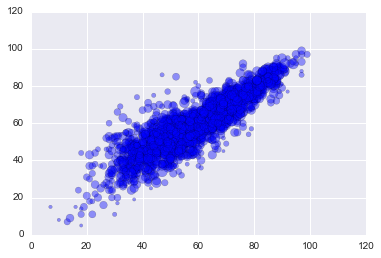

In [4]:
g  = plt.scatter(\
            x=schools['percent_passing_reading'], 
            y=schools['percent_passing_math'], 
            s=schools['total_enrollment']/10, # s is size
            alpha=0.4)             # alpha means opacity. so you can see the overlapping dots.


Let’s orient ourselves real quick. Up and down is performance on math; left to right is performance on reading. Bottom left is a low passing rate on both. Top right is a high rate on both.

So that’s sort of cool, right? If you’re into scatterplots. You can very quickly get a feel for what the distribution looks like.

But that doens't tell you much about Pinellas. That's where Seaborn gets super helpful. We’re going to use a function called [FacetGrid](http://seaborn.pydata.org/generated/seaborn.FacetGrid.html) that makes it easy to highlight different attributes of the data set.

Let’s start by putting all the Pinellas schools in their own color.

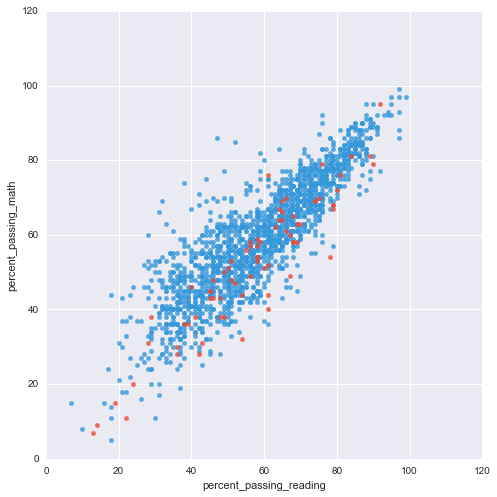

In [5]:
# Highlight Pinellas with facetgrid
g = sns.FacetGrid(schools,
                  hue='pinellas_flag', 
                  palette=pinellas_palette,
                  size=7)

g.map(plt.scatter, "percent_passing_reading", "percent_passing_math", 
      alpha=.8)

Look in the bottom left corner. You see those five dots? Those are our five schools. They **really** stand out.

Let’s stop for half a second to export this for print, just to show everyone we can. We actually ran a chart a lot like this with our project. It’s literally one line of code, which will pop out a PDF that opens easily in Illustrator and will delight your news art department, if you have one:

In [6]:
g.savefig('graphic.pdf', transparent=True)

## Step #2: Exploring possible causes [Facets]
OK, so we’ve established that we’ve got an outlier. What now? 

Let’s quickly step back and remember why we got into this story. We know these 5 schools are doing really really poorly. We haven't mentioned this yet, but we also know those five schools became overwhelmingly black as a result of resegregation.

That presents one challenge for this project. People know black kids can struggle to pass standardized tests. We need to show that doesn't explain the whole of the trend.

Our story is dead in the water if we can't show that what’s happening here is bigger than that thing everyone already knows. So that seems like a logical place to start. Let’s make a grid that shows us how the pattern changes when you look at majority-black schools.

One of our favorite ways to do this is by using our FacetGrid to go from one big scatterplot to a grid of multiple smaller scatterplots. That's where the "Grid" part comes in. It's a really neat way to question the data.

We can break up the data into subsets, by "facets." Seaborn lets us arrange these subsets by row, columns and even colors, like we just did in the example above. Let's break up the data by one of the most common indicators we talk about concerning students in Florida schools: race.

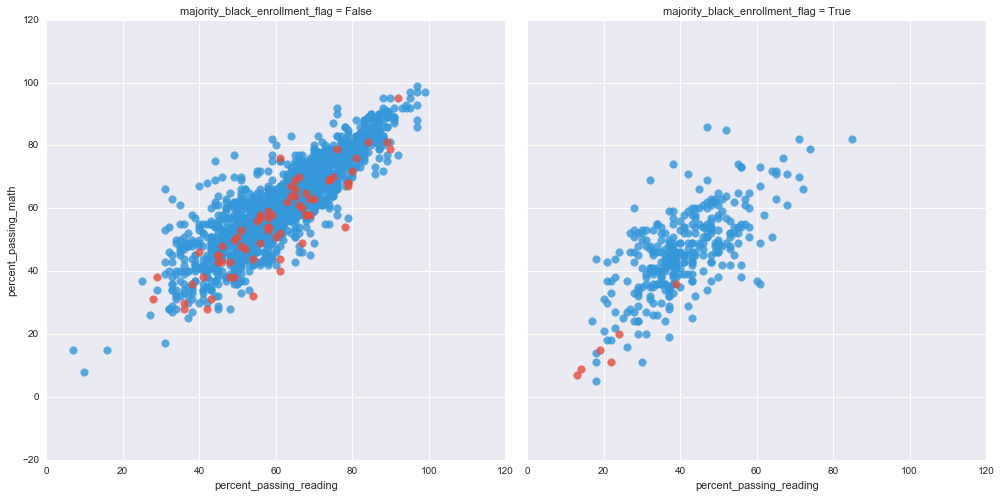

In [7]:
g = sns.FacetGrid(schools,
                  hue='pinellas_flag', 
                  col='majority_black_enrollment_flag',
                  palette=pinellas_palette,
                  size=7)
g.map(plt.scatter, "percent_passing_reading", "percent_passing_math", 
      alpha=.8, 
      s=60)

Again, lets orient ourselves. Same scatterplot as before. But now the plot on the right is majority-black schools. The plot on the left is everyone else.

You can immediately see some meaningful stuff here. First, even though the black schools are a little tilted toward the bottom-right, you can see immediately that these five schools stand out *even when you only look at majority-black elementary schools.* 

You can also see that we’re talking about almost ALL of the majority black elementary schools in Pinellas County. So not like we’re cherrypicking.

Now let’s layer in poverty (which we’re going to do schools that are majority free and reduced-price lunch). Copy-paste from the last cell and add a ”row” variable.

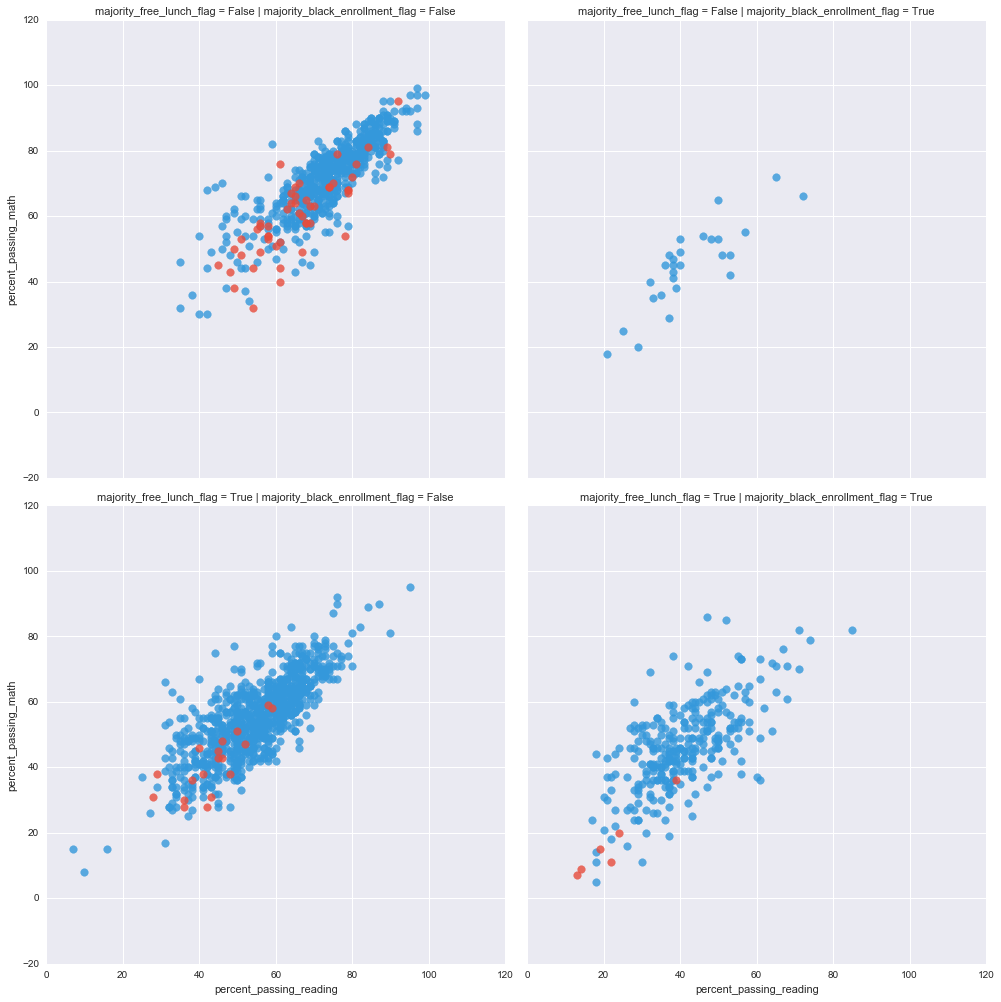

In [8]:
g = sns.FacetGrid(schools,
                  hue='pinellas_flag', 
                  col='majority_black_enrollment_flag',
                  row='majority_free_lunch_flag',
                  palette=pinellas_palette,
                  size=7)
g.map(plt.scatter, "percent_passing_reading", "percent_passing_math", 
      alpha=.8, 
      s=60)

Again, orient. Top-left is *not* black, *not* high-poverty. Bottom right is majority black *and* high poverty. Bottom right is where our five schools are.

In that bottom right quadrant we see basically the same thing again. This **isn't** just a matter of us cherrypicking five poor schools. In fact it would be impossible to find five other dots that would work the same way (and super impossible to find that in the same district).

## Step #3: Speeding up our cause-hunting [PairGrid]
So already you can see a way here to ask questions of the data. But we actually don't have to restrict ourselves to doing this one variable at a time.

What we need is something called a **[PairGrid](http://seaborn.pydata.org/generated/seaborn.PairGrid.html)**. (For R nerds, we’ve seen something similar called a Correlograms.)

What a PairGrid is going to do is take every variable in the dataset and plot it against every other variable. It’s a little overwhelming, but that way we can see how a lot of variables relate to each other.

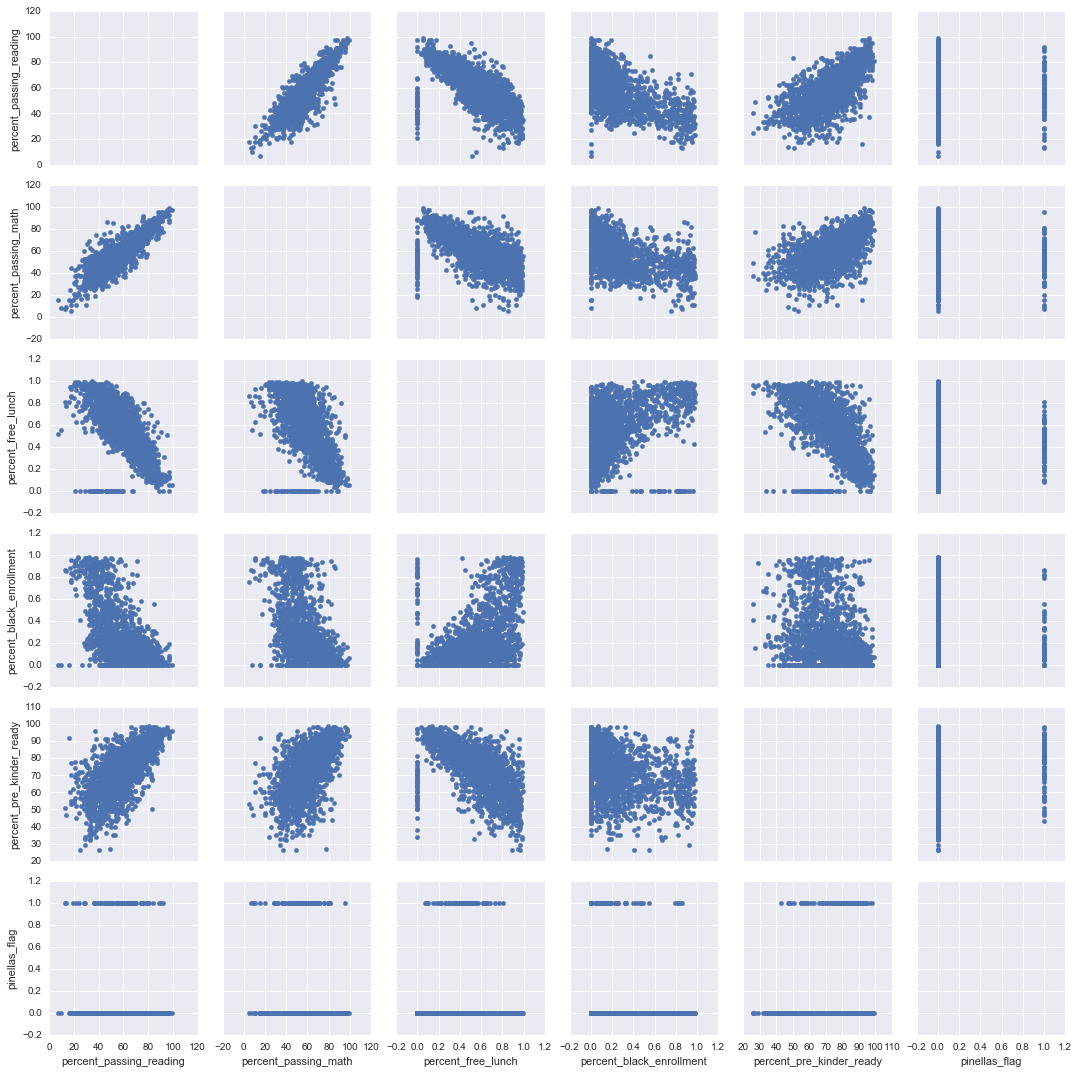

In [9]:
grid_columns = ["percent_passing_reading", "percent_passing_math", "percent_free_lunch", "percent_black_enrollment", "percent_pre_kinder_ready", "pinellas_flag"]
g = sns.PairGrid(schools[grid_columns])
#g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

# (pairplot() works, too)

Ctl-click and open that in a new tab to make your life a little easier. Then use the labels to orient yourself.

We know, we know, this is overwhelming at first. But the more you study, the more insight you find.

* Take **black enrollment v. percent passing (both reading and math)**. That distribution actually is NOT a crazy tight straight-line relationship for the rest of the state (the blue dots). That helps us, in again providing extra evidence that it's not *impossible* for black kids to do well on these tests.
* See how **Free lunch v. black enrollment** sorta tapers off as you go off to the right? That tells us that the relationship isn't totally linear. And then look at the five right-most Pinellas dots. Sure, they're way off to the top — but there are clearly hundreds and hundreds of schools with more poor kids and more black kids. There are *not* hundreds and hundreds of schools that are doing worse, though. Remember our scatterplot earlier? We couldn't find 5.
* For **percent_black_enrollment vs pinellas_flag**: This is a little harder to read — each line is basically a distribution (top line in Pinellas, bottom line not in Pinellas). Look at the top distribution. You see that cluster of dots way off to the right? Those are our 5 schools!

Now look at "percent pre kinder ready." That’s the percent of kids who pass their kindergarten readiness exam. What do you see?

## Step #4. But what if it’s in the water? [Regressions]

This bit of data is actually *really* important. Remember what we’re doing here today. We’re trying to DISPROVE that there is some other lurking variable here that’s causing all the kids to fail, aside from the school board’s actions.

So how well the kids do before they’ve spent a day in the class is critical. Because what if the kids are coming to school less prepared than every other kid in the state of Florida? How do we show it’s not just something in the water that the school board has no control over?

We don’t write about regressions basically ever, but this is a case where doing the math is an important check, to make sure we’re not doing something stupid.

So let's plot the relationship between reading passage rates and pre-kindergarten readiness. And this time, let's highlight just our 5 schools instead of everyone in Pinellas.

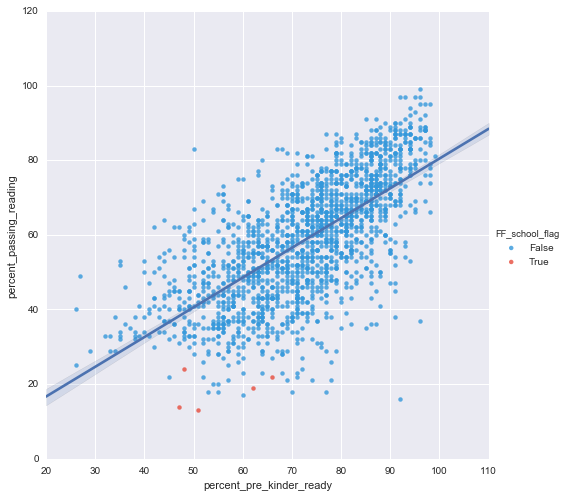

In [10]:
g = sns.lmplot(data=schools, x='percent_pre_kinder_ready', y='percent_passing_reading',
               hue='FF_school_flag',
               palette=pinellas_palette,
               fit_reg=False,
               size=7)
sns.regplot(x="percent_pre_kinder_ready", y="percent_passing_reading", data=schools, scatter=False, ax=g.axes[0, 0])


Now the five schools are the red dots. If we were doing exactly normal, based on how ready the kids showed up to learn in Kindergarten, you'd expect our red dots to be somewhere close to the line. They definitely are not.

Just because we won’t ever use the word ”regression“ in print doesn't mean we won’t get to write something amazing off of having done the work...

> A Times analysis of statewide kindergarten readiness data shows that new students in Pinellas County’s most segregated schools show up no less prepared than students in scores of other struggling, high-poverty schools.
> It’s only after a few years in Pinellas classrooms that they’re falling behind their peers statewide.

## Thank you! Any questions?